In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import scipy
from scipy.interpolate import UnivariateSpline

sns.set_context('paper', font_scale=1.5)
sns.set_palette('colorblind')

import nudetect
H119_dir = '/Volumes/Samsung_1TB/detectorData/H119/'
plot_dir = H119_dir + 'figures/'
save_dir = H119_dir + 'data_products/'

GammaAm2415C500V
GammaEu1555C500V


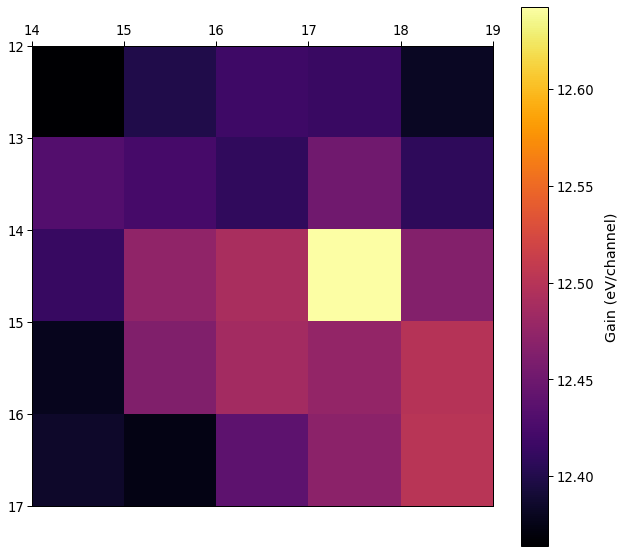

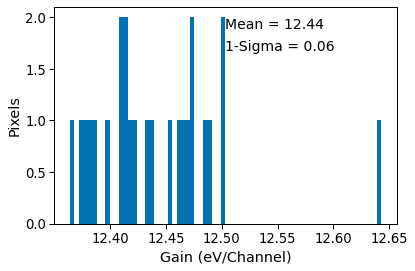

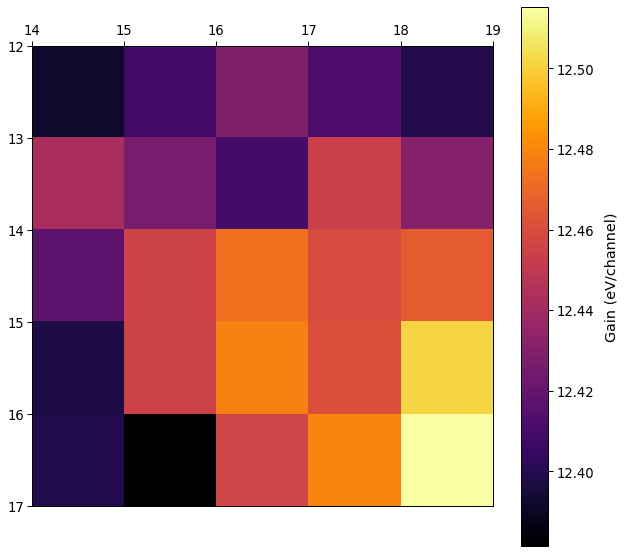

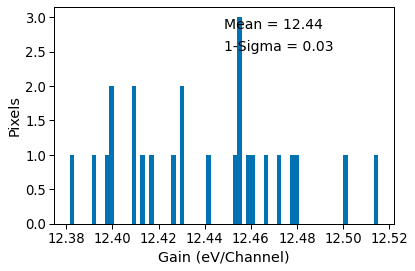

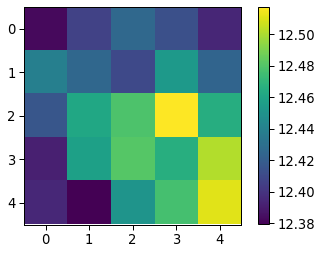

In [2]:
H119 = nudetect.Detector('H119', offset=np.zeros((32,32,16)))
Am241 = nudetect.Source('Am241')
Eu155 = nudetect.Source('Eu155')
Am241_flood = nudetect.GammaFlood(H119_dir + 'floodAm241_5C_-500V_20190815_small_region_capoffset_corrected.fits',\
                               'H119', Am241, 500, 5, data_dir=save_dir, plot_dir=plot_dir, region = [[14,12],[19,17]])
Eu155_flood = nudetect.GammaFlood(H119_dir + 'floodEu155_5C_-500V_20190816_small_region_capoffset_corrected.fits',\
                               'H119', Eu155, 500, 5, data_dir=save_dir, plot_dir=plot_dir, region = [[14,12],[19,17]])

Am241_flood = H119.add_experiment(Am241_flood)
Eu155_flood = H119.add_experiment(Eu155_flood)
H119.print_experiments()

full_gain = H119.gen_full_gain((Am241_flood, Eu155_flood))
plt.figure()
plt.imshow(1000*full_gain)
plt.colorbar()

# Depth plot and spectra without depth cut

In [4]:
am_spectrum, am_energies, am_depths = Am241_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=0, exclude_edges=True, depth_plot=True)
eu_spectrum, eu_energies, eu_depths = Eu155_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=0, exclude_edges=True, depth_plot=True)

Gain corrections have not yet been applied to the events. Correcting.
The SUBTH column has not yet been generated. Generating now using thresh=55


  0%|                                                                               | 0/5 [00:00<?, ?it/s]/Users/sean/nudetect/nudetect.py:4312: RuntimeWarning: invalid value encountered in double_scalars
  ph_subth_list.append(keV_to_PI(np.sum(np.multiply(np.multiply(ph_subth_mask, pulse_tr_grid), gain_grid))/np.sum(ph_subth_mask)))
/Users/sean/nudetect/nudetect.py:4312: RuntimeWarning: invalid value encountered in multiply
  ph_subth_list.append(keV_to_PI(np.sum(np.multiply(np.multiply(ph_subth_mask, pulse_tr_grid), gain_grid))/np.sum(ph_subth_mask)))
/Users/sean/nudetect/nudetect.py:4314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.raw_data_1d['PI'].loc[(row_mask) & (col_mask)] = pi_list
/Users/sean/nudetect/nudetect.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Gain corrections have not yet been applied to the events. Correcting.
The SUBTH column has not yet been generated. Generating now using thresh=55


  0%|                                                                               | 0/5 [00:00<?, ?it/s]/Users/sean/nudetect/nudetect.py:4312: RuntimeWarning: invalid value encountered in double_scalars
  ph_subth_list.append(keV_to_PI(np.sum(np.multiply(np.multiply(ph_subth_mask, pulse_tr_grid), gain_grid))/np.sum(ph_subth_mask)))
/Users/sean/nudetect/nudetect.py:4312: RuntimeWarning: invalid value encountered in multiply
  ph_subth_list.append(keV_to_PI(np.sum(np.multiply(np.multiply(ph_subth_mask, pulse_tr_grid), gain_grid))/np.sum(ph_subth_mask)))
/Users/sean/nudetect/nudetect.py:4314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.raw_data_1d['PI'].loc[(row_mask) & (col_mask)] = pi_list
/Users/sean/nudetect/nudetect.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

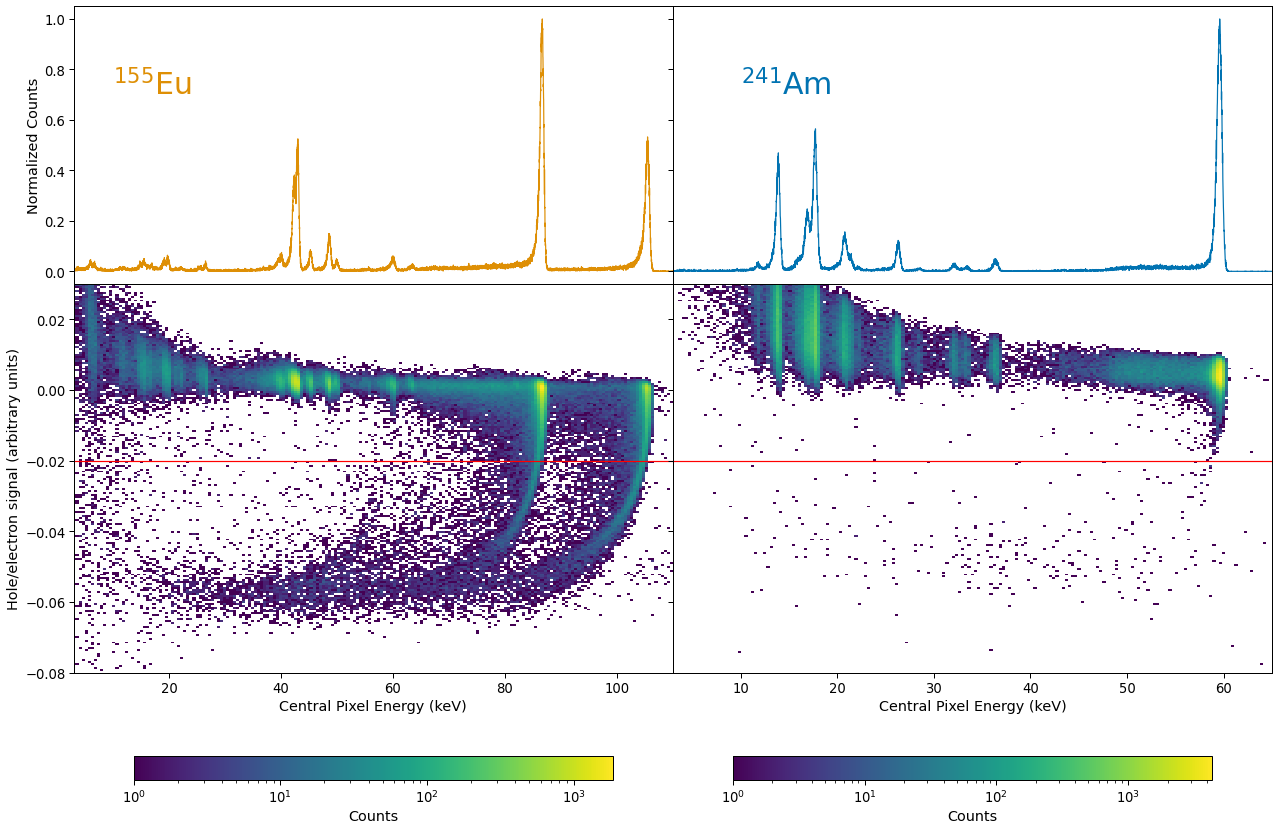

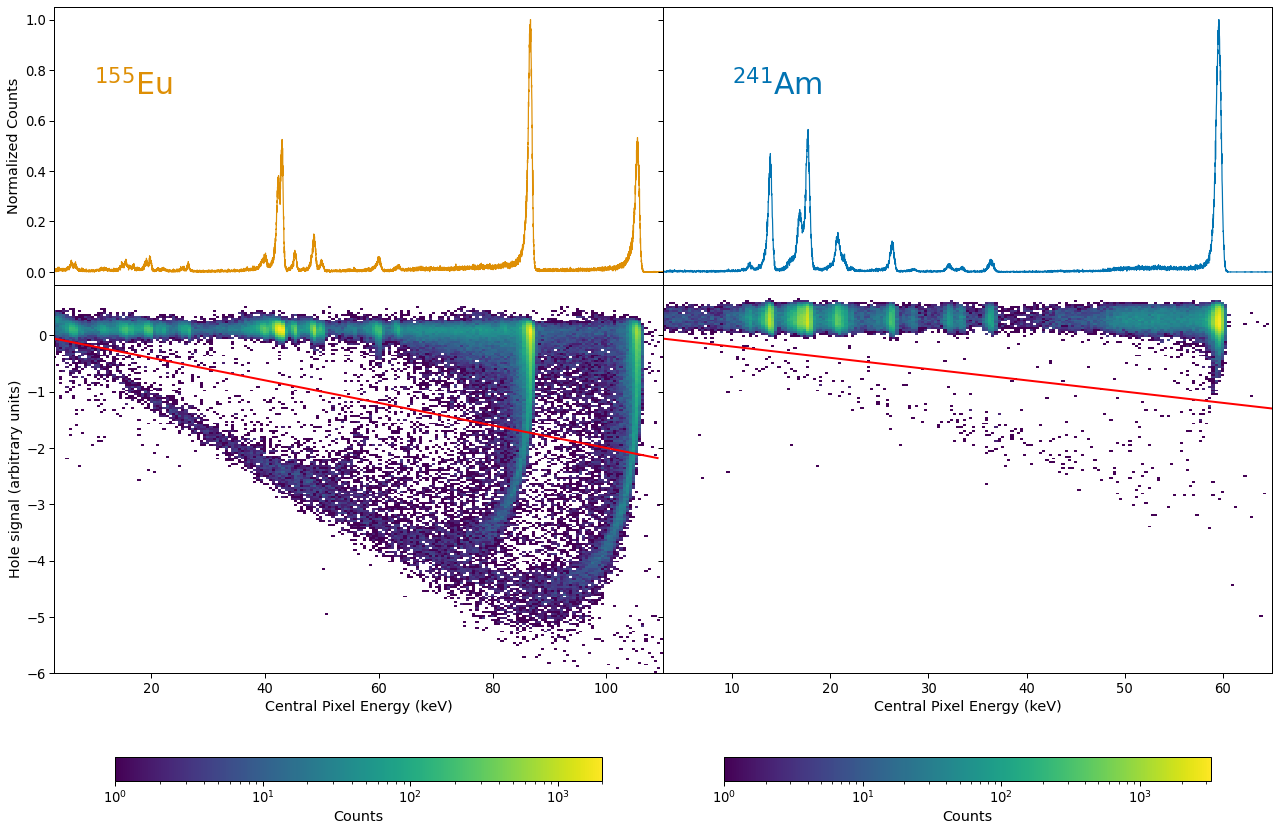

In [5]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(figsize=(18,12), nrows=2, ncols=2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace':0, 'height_ratios': (1,2)})
ax1.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), rasterized=True, color='C1')
ax1.text(10,0.7, r'$^{155}\mathrm{Eu}$', fontsize=30, color='C1')
_, _, _, eu_map = ax2.hist2d(eu_energies, eu_depths, bins = 200, range = ((0,110), (-0.08, 0.03)), norm=colors.LogNorm())
ax2.set_ylim(-0.08,0.025)
ax2.set_xlim(3,110)
ax2.axhline(-0.02, color='red')
ax1.set_ylabel('Normalized Counts')
ax2.set_xlabel('Central Pixel Energy (keV)')
ax2.set_ylabel('Hole/electron signal (arbitrary units)')
# plt.show()
    
ax3.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), color='C0', rasterized=True)
ax3.text(10,0.7, r'$^{241}\mathrm{Am}$', fontsize=30, color='C0')
_, _, _, am_map = ax4.hist2d(am_energies, am_depths, bins = 200, range = ((0,65), (-0.08, 0.03)), norm=colors.LogNorm())
ax4.set_xlim(3,65)
ax4.axhline(-0.02, color='red')
ax4.set_xlabel('Central Pixel Energy (keV)')
plt.colorbar(mappable=am_map, ax = ax2, orientation='horizontal', shrink = 0.8, label='Counts')
plt.colorbar(mappable=eu_map, ax = ax4, orientation='horizontal', shrink = 0.8, label='Counts')
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_depth_grade0_noedges.pdf')

# Plot 
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(figsize=(18,12), nrows=2, ncols=2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace':0, 'height_ratios': (1,2)})
ax1.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), rasterized=True, color='C1')
ax1.text(10,0.7, r'$^{155}\mathrm{Eu}$', fontsize=30, color='C1')
_, _, _, eu_map = ax2.hist2d(eu_energies, eu_depths*eu_energies, bins = 200, range = ((0,110), (-6, 0.9)), norm=colors.LogNorm())
# ax2.set_ylim(-0.08,0.025)
ax2.set_xlim(3,110)
ax2.plot(-0.02*np.arange(0,110), color='red', lw=2.0)
ax1.set_ylabel('Normalized Counts')
ax2.set_xlabel('Central Pixel Energy (keV)')
ax2.set_ylabel('Hole signal (arbitrary units)')
# plt.show()
    
ax3.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), color='C0', rasterized=True)
ax3.text(10,0.7, r'$^{241}\mathrm{Am}$', fontsize=30, color='C0')
_, _, _, am_map = ax4.hist2d(am_energies, am_depths*am_energies, bins = 200, range = ((0,65), (-6, 0.9)), norm=colors.LogNorm())
ax4.set_xlim(3,65)
ax4.plot(-0.02*np.arange(0,110), color='red', lw=2.0)
ax4.set_xlabel('Central Pixel Energy (keV)')
plt.colorbar(mappable=am_map, ax = ax2, orientation='horizontal', shrink = 0.8, label='Counts')
plt.colorbar(mappable=eu_map, ax = ax4, orientation='horizontal', shrink = 0.8, label='Counts')
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_depth_grade0_noedges_holeonly.pdf')

In [5]:
plt.ion()
plt.figure(figsize = (9,6))
plt.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), label=r'$^{241}\mathrm{Am}$')
plt.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), label=r'$^{155}\mathrm{Eu}$')
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized Counts')
plt.legend()
plt.xlim(0.0,110.)
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_offset_grade0_noedges.pdf')
plt.close()
# plt.ylim(0,600) 

In [6]:
from astropy.modeling import models, fitting
def tie_stddevs(model):
    return model.stddev_0

def tie_stddevs3(model):
    return model.stddev_3

def tie_means(model):
    return model.mean_0

def tie_means3(model):
    return model.mean_3

def exp_tail(x, norm=1, mean=0, stddev=1, slope=1):
    return norm*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev))

def exp_tail_deriv(x, norm=1, mean=0, stddev=1, slope=1):
    return [
        np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*np.exp(slope*(x-mean) - (x - mean)**2 / stddev**2 * 0.5)/(stddev*np.sqrt(2*np.pi)) -\
            norm*slope*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*(x-mean)*np.exp(slope*(x-mean) - (x - mean)**2 / stddev**2 * 0.5)/(stddev*stddev*np.sqrt(2*np.pi)),
        norm*(x-mean)*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev))
    ]

# ExpTail = models.custom_model(exp_tail, fit_deriv=exp_tail_deriv)
ExpTail = models.custom_model(exp_tail)

def const_shelf(x, norm=1, mean=0, stddev=1):
    return norm*(1-scipy.stats.norm.cdf(x, mean, stddev))

def const_shelf_deriv(x, norm=1, mean=0, stddev=1):
    return [
        (1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*np.exp(-0.5*(x-mean)**2 / stddev**2) / (np.sqrt(2*np.pi) * stddev),
        norm*(x-mean)*np.exp(-0.5*(x-mean)**2 / stddev**2) / (np.sqrt(2*np.pi) * stddev**2)
    ]

# ConstShelf = models.custom_model(const_shelf, fit_deriv=const_shelf_deriv)
ConstShelf = models.custom_model(const_shelf)



## Eu155 86keV

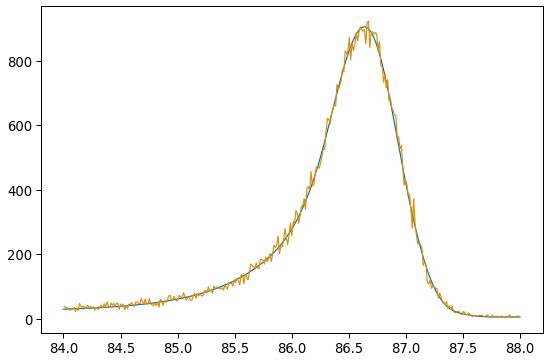

FWHM: 0.7625101527840599
[4.44053867e+02 8.66893221e+01 2.65669842e-01 1.84973214e+01
 8.66893221e+01 2.65669842e-01 8.66114047e+02 8.66893221e+01
 2.65669842e-01 1.86342254e+00 5.09654071e+00]
None


In [9]:
upper=7400
lower=6850

line_init = models.Gaussian1D(amplitude=1600, mean=86.8, stddev=0.4) + ConstShelf(norm=60, mean=86.8, stddev=0.4) + \
    ExpTail(norm=1000, mean=86.8, stddev=0.4, slope=1.5) + models.Const1D(amplitude=20)

# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper], weights = 1/np.sqrt(eu_spectrum[0][lower:upper]))

xs = np.linspace(84, 88, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line.parameters[-1] - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper], yerr=np.sqrt(eu_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(eu_spectrum[1][lower:upper], line(eu_spectrum[1][lower:upper]))

ax1.plot(eu_spectrum[1][lower:upper], line[0](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[1](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[2](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[3](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((1, 2000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(82.5, 1200, r'Source: $^{155}$Eu')
ax1.text(82.5, 700, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(82.5, 400, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_grade0_86kev_fit_noedges.pdf')
plt.close()

# chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\
#                    eu_spectrum[0][lower:upper])/len(eu_spectrum[0][lower:upper] - 7)
# print(chisq_red)


plt.figure(figsize=(9,6))
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 86) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 86) < 2])
plt.show()
plt.close()
del xs, spline
print('FWHM: ' + str(roots[1] - roots[0]))

print(line.parameters)
print(line.stds)

## Eu155 105keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_41491/2747495002.py:43: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_41491/2747495002.py:52: RuntimeWarning: divide by zero encountered in true_divide
  chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\


inf
0.8847254897600436
[2.07259464e+02 1.05545220e+02 2.90218234e-01 1.88801660e+01
 1.05545220e+02 2.90218234e-01 4.59235627e+02 1.05545220e+02
 2.90218234e-01 1.58228107e+00]
None


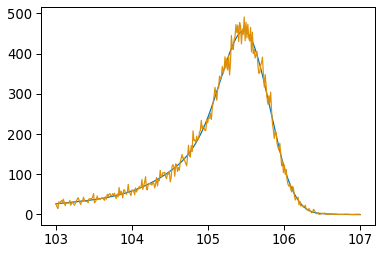

In [10]:
upper=8890
lower=8500
line_init = models.Gaussian1D(amplitude=250, mean=105, stddev=0.2) + ConstShelf(norm=0.1, mean=105, stddev=0.4) + \
        ExpTail(norm=100, mean=105, stddev=0.4, slope=.1)# + models.Const1D(amplitude=20)


# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

zero_mask = eu_spectrum[0][lower:upper]!=0

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper])

xs = np.linspace(103, 107, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper], yerr=np.sqrt(eu_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(eu_spectrum[1][lower:upper], line(eu_spectrum[1][lower:upper]))

ax1.plot(eu_spectrum[1][lower:upper], line[0](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[1](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[2](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((1, 2000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(102.2, 1200, r'Source: $^{155}$Eu')
ax1.text(102.2, 700, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(102.2, 400, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')


ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_grade0_105kev_fit_noedges.pdf')
plt.close()

chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\
                   eu_spectrum[0][lower:upper])/len(eu_spectrum[0][lower:upper] - 7)
print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 105) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 105) < 2])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(line.stds)


## Am241 59.5keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_41491/760463410.py:40: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(am_spectrum[1][lower:upper], (am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper]))/np.sqrt(am_spectrum[0][lower:upper]),


0.6271558490855185
[2.02756794e+02 5.95764943e+01 2.16027827e-01 1.59624581e+01
 5.95764943e+01 2.16027827e-01 1.39349461e+03 5.95764943e+01
 2.16027827e-01 3.60005600e+00]
[[ 2.55515879e+03  1.50139060e-01  1.16399906e-01 -2.05136342e+01
  -5.04892374e+03 -6.26296414e+00]
 [ 1.50139060e-01  2.33702647e-05  3.30611081e-06 -2.58591108e-03
  -2.92894036e-01 -5.27893105e-04]
 [ 1.16399906e-01  3.30611081e-06  6.77921845e-06 -7.65655378e-04
  -2.33218417e-01 -2.56380783e-04]
 [-2.05136342e+01 -2.58591108e-03 -7.65655378e-04  1.20368585e+00
   3.96691527e+01  7.36323165e-02]
 [-5.04892374e+03 -2.92894036e-01 -2.33218417e-01  3.96691527e+01
   1.00032899e+04  1.23746068e+01]
 [-6.26296414e+00 -5.27893105e-04 -2.56380783e-04  7.36323165e-02
   1.23746068e+01  1.74668688e-02]]


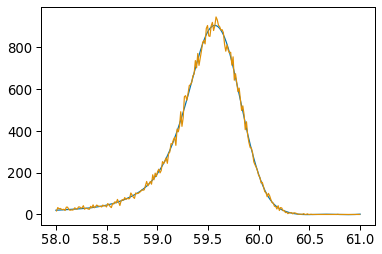

In [11]:
upper=5050
lower=4700

line_init = models.Gaussian1D(amplitude=150, mean=59.6, stddev=0.22) + ConstShelf(norm=11, mean=59.5, stddev=0.2) + \
    ExpTail(norm=920, mean=59.5, stddev=0.2, slope=3.7)# + models.Const1D(amplitude=20)

# line_init = models.Gaussian1D(amplitude=500, mean=59.5, stddev=0.2) + ConstShelf(norm=10, mean=59.5, stddev=0.2)


line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means

zero_mask = am_spectrum[0][lower:upper]!=0

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][lower:upper], am_spectrum[0][lower:upper])

xs = np.linspace(58, 61, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][lower:upper], am_spectrum[0][lower:upper], yerr=np.sqrt(am_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(am_spectrum[1][lower:upper], line(am_spectrum[1][lower:upper]))

ax1.plot(am_spectrum[1][lower:upper], line[0](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[1](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[2](am_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((1, 2000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(56.6, 1200, r'Source: $^{241}$Am')
ax1.text(56.6, 700, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(56.6, 400, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(am_spectrum[1][lower:upper], (am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper]))/np.sqrt(am_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_grade0_60kev_fit_noedges.pdf')
plt.close()


# chisq_red = np.sum(((am_spectrum[0][lower:upper][zero_mask] - line(am_spectrum[1][lower:upper][zero_mask])) ** 2)/\
#                    am_spectrum[0][lower:upper][zero_mask])/len(am_spectrum[0][lower:upper][zero_mask] - 7)
# print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 59.5) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 59.5) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])


## Am241 14keV

1.0960000873674005
0.45331731061285296
[2.13750083e+02 1.39254224e+01 1.65114193e-01 3.72161646e+02
 1.39254224e+01 1.65114193e-01 3.13581379e+00 8.15225130e+00]
[[ 5.95170117e+02 -5.34155349e-02  6.71048812e-02 -1.13365057e+03
  -5.17685094e+00 -1.55970038e+01]
 [-5.34155349e-02  1.14210060e-05 -8.47662884e-06  1.03643961e-01
   3.36285135e-04  4.02315008e-04]
 [ 6.71048812e-02 -8.47662884e-06  1.08663013e-05 -1.31766306e-01
  -5.70771069e-04 -1.99935646e-03]
 [-1.13365057e+03  1.03643961e-01 -1.31766306e-01  2.18139826e+03
   9.93148832e+00  2.86669243e+01]
 [-5.17685094e+00  3.36285135e-04 -5.70771069e-04  9.93148832e+00
   4.98002019e-02  1.75514398e-01]
 [-1.55970038e+01  4.02315008e-04 -1.99935646e-03  2.86669243e+01
   1.75514398e-01  1.48163075e+00]]


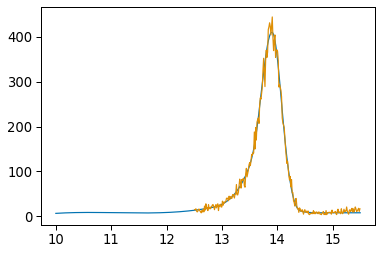

In [12]:
lower=1020
upper=1250

# line_init = models.Gaussian1D(amplitude=250, mean=13.9, stddev=0.3) + ConstShelf(norm=1, mean=13.9, stddev=0.2) + models.Const1D(amplitude=20)

line_init = models.Gaussian1D(amplitude=400, mean=13.9, stddev=0.2) + \
    ExpTail(norm=250, mean=13.9, stddev=0.2, slope=3.6) + models.Const1D(amplitude=10)

line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means


fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][lower:upper], am_spectrum[0][lower:upper])


xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots


fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][lower:upper], am_spectrum[0][lower:upper], yerr=np.sqrt(am_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(am_spectrum[1][lower:upper], line(am_spectrum[1][lower:upper]))

ax1.plot(am_spectrum[1][lower:upper], line[0](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[1](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[2](am_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((1, 2000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(12.4, 1200, r'Source: $^{241}$Am')
ax1.text(12.4, 700, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(12.4, 400, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(am_spectrum[1][lower:upper], (am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper]))/np.sqrt(am_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_grade0_14kev_fit_noedges.pdf')
plt.close()

chisq_red = np.sum(((am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper])) ** 2)/\
                   am_spectrum[0][lower:upper])/len(am_spectrum[0][lower:upper] - 7)
print(chisq_red)

xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 14) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 14) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])


# With depth cut = -0.02

In [24]:
depth_cut = -0.02
am_spectrum, am_energies = Am241_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=0, exclude_edges=False, depth_cut=depth_cut)
eu_spectrum, eu_energies = Eu155_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=0, exclude_edges=False, depth_cut=depth_cut)

In [25]:
plt.ion()
plt.figure(figsize = (9,6))
plt.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), label=r'$^{241}\mathrm{Am}$')
plt.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), label=r'$^{155}\mathrm{Eu}$')
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized Counts')
plt.legend()
plt.xlim(0.0,110.)
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_offset_grade0_depthcut.pdf')
plt.close()
# plt.ylim(0,600) 

## Eu155 86keV

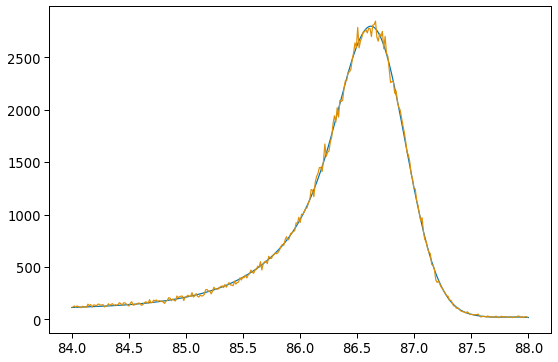

FWHM: 0.7869163160775514
[1.12718808e+03 8.66799123e+01 2.65577575e-01 7.73704803e+01
 8.66799123e+01 2.65577575e-01 3.11818138e+03 8.66799123e+01
 2.65577575e-01 1.97295371e+00 2.08147512e+01]
None


In [26]:
upper=7400
lower=6850

line_init = models.Gaussian1D(amplitude=1600, mean=86.8, stddev=0.4) + ConstShelf(norm=60, mean=86.8, stddev=0.4) + \
    ExpTail(norm=1000, mean=86.8, stddev=0.4, slope=1.5) + models.Const1D(amplitude=20)

# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper], weights = 1/np.sqrt(eu_spectrum[0][lower:upper]))

xs = np.linspace(84, 88, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line.parameters[-1] - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper], yerr=np.sqrt(eu_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(eu_spectrum[1][lower:upper], line(eu_spectrum[1][lower:upper]))

ax1.plot(eu_spectrum[1][lower:upper], line[0](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[1](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[2](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[3](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((10, 4000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(82.5, 1200, r'Source: $^{155}$Eu')
ax1.text(82.5, 700, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(82.5, 400, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_grade0_86kev_fit_depthcut.pdf')
plt.close()

# chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\
#                    eu_spectrum[0][lower:upper])/len(eu_spectrum[0][lower:upper] - 7)
# print(chisq_red)


plt.figure(figsize=(9,6))
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 86) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 86) < 2])
plt.show()
plt.close()
del xs, spline
print('FWHM: ' + str(roots[1] - roots[0]))

print(line.parameters)
print(line.stds)

## Eu155 105keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_38892/3052685791.py:43: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_38892/3052685791.py:52: RuntimeWarning: divide by zero encountered in true_divide
  chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\


inf
0.9506133389206894
[3.65260856e+02 1.05514614e+02 2.85848111e-01 4.23243984e+01
 1.05514614e+02 2.85848111e-01 1.82488740e+03 1.05514614e+02
 2.85848111e-01 1.64268250e+00]
None


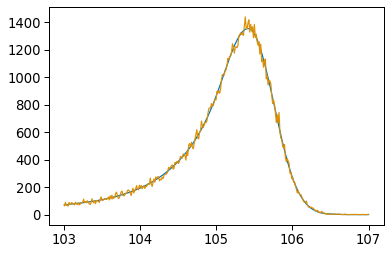

In [27]:
upper=8890
lower=8500
line_init = models.Gaussian1D(amplitude=250, mean=105, stddev=0.2) + ConstShelf(norm=0.1, mean=105, stddev=0.4) + \
        ExpTail(norm=100, mean=105, stddev=0.4, slope=.1)# + models.Const1D(amplitude=20)


# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

zero_mask = eu_spectrum[0][lower:upper]!=0

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper])

xs = np.linspace(103, 107, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper], yerr=np.sqrt(eu_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(eu_spectrum[1][lower:upper], line(eu_spectrum[1][lower:upper]))

ax1.plot(eu_spectrum[1][lower:upper], line[0](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[1](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[2](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((10, 4000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(102.2, 1200, r'Source: $^{155}$Eu')
ax1.text(102.2, 700, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(102.2, 400, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')


ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_grade0_105kev_fit_depthcut.pdf')
plt.close()

chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\
                   eu_spectrum[0][lower:upper])/len(eu_spectrum[0][lower:upper] - 7)
print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 105) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 105) < 2])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(line.stds)


## Am241 59.5keV

0.6189114244718823
[1.69661074e+03 5.96286264e+01 2.28203469e-01 9.23833103e+01
 5.96286264e+01 2.28203469e-01 2.84746163e+03 5.96286264e+01
 2.28203469e-01 2.88254217e+00]
[[ 6.36314961e+03  2.41932290e-02  9.81872507e-02 -8.55977824e+01
  -1.26892836e+04 -6.13081557e+00]
 [ 2.41932290e-02  1.17963811e-06  1.07434332e-08 -1.05187794e-03
  -4.72568369e-02 -4.07719814e-05]
 [ 9.81872507e-02  1.07434332e-08  1.84412876e-06 -1.19546842e-03
  -1.98658764e-01 -9.09863769e-05]
 [-8.55977824e+01 -1.05187794e-03 -1.19546842e-03  4.74354713e+00
   1.68427245e+02  1.04168627e-01]
 [-1.26892836e+04 -4.72568369e-02 -1.98658764e-01  1.68427245e+02
   2.53885668e+04  1.22539989e+01]
 [-6.13081557e+00 -4.07719814e-05 -9.09863769e-05  1.04168627e-01
   1.22539989e+01  6.31855957e-03]]


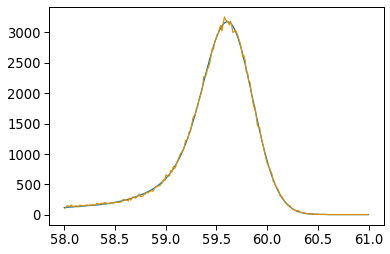

In [28]:
upper=5050
lower=4700

line_init = models.Gaussian1D(amplitude=150, mean=59.6, stddev=0.22) + ConstShelf(norm=11, mean=59.5, stddev=0.2) + \
    ExpTail(norm=920, mean=59.5, stddev=0.2, slope=3.7)# + models.Const1D(amplitude=20)

# line_init = models.Gaussian1D(amplitude=500, mean=59.5, stddev=0.2) + ConstShelf(norm=10, mean=59.5, stddev=0.2)


line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means

zero_mask = am_spectrum[0][lower:upper]!=0

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][lower:upper], am_spectrum[0][lower:upper])

xs = np.linspace(58, 61, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][lower:upper], am_spectrum[0][lower:upper], yerr=np.sqrt(am_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(am_spectrum[1][lower:upper], line(am_spectrum[1][lower:upper]))

ax1.plot(am_spectrum[1][lower:upper], line[0](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[1](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[2](am_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((10, 4000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(56.6, 1200, r'Source: $^{241}$Am')
ax1.text(56.6, 700, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(56.6, 400, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(am_spectrum[1][lower:upper], (am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper]))/np.sqrt(am_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_grade0_60kev_fit_depthcut.pdf')
plt.close()


# chisq_red = np.sum(((am_spectrum[0][lower:upper][zero_mask] - line(am_spectrum[1][lower:upper][zero_mask])) ** 2)/\
#                    am_spectrum[0][lower:upper][zero_mask])/len(am_spectrum[0][lower:upper][zero_mask] - 7)
# print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 59.5) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 59.5) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])


## Am241 14keV

1.0697105174291477
0.46843802555785174
[7.53674028e+02 1.40043741e+01 1.80024507e-01 1.07554544e+03
 1.40043741e+01 1.80024507e-01 2.86124456e+00 8.18977060e+01]
[[ 1.81417176e+03 -4.60854827e-02  6.79653934e-02 -3.46288365e+03
  -5.19477873e+00 -5.83801747e+01]
 [-4.60854827e-02  3.21589911e-06 -2.42100496e-06  9.03530621e-02
   9.35460730e-05  3.08024660e-04]
 [ 6.79653934e-02 -2.42100496e-06  3.61256066e-06 -1.33857284e-01
  -1.92481929e-04 -2.48551232e-03]
 [-3.46288365e+03  9.03530621e-02 -1.33857284e-01  6.67849778e+03
   9.96836100e+00  1.07342949e+02]
 [-5.19477873e+00  9.35460730e-05 -1.92481929e-04  9.96836100e+00
   1.62760653e-02  2.11056829e-01]
 [-5.83801747e+01  3.08024660e-04 -2.48551232e-03  1.07342949e+02
   2.11056829e-01  5.80414303e+00]]


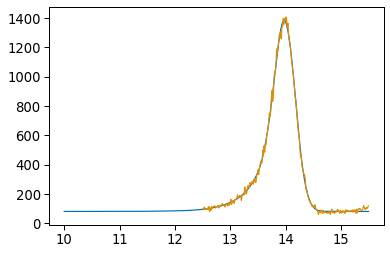

In [29]:
lower=1020
upper=1250

# line_init = models.Gaussian1D(amplitude=250, mean=13.9, stddev=0.3) + ConstShelf(norm=1, mean=13.9, stddev=0.2) + models.Const1D(amplitude=20)

line_init = models.Gaussian1D(amplitude=400, mean=13.9, stddev=0.2) + \
    ExpTail(norm=250, mean=13.9, stddev=0.2, slope=3.6) + models.Const1D(amplitude=10)

line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means


fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][lower:upper], am_spectrum[0][lower:upper])


xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots


fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][lower:upper], am_spectrum[0][lower:upper], yerr=np.sqrt(am_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(am_spectrum[1][lower:upper], line(am_spectrum[1][lower:upper]))

ax1.plot(am_spectrum[1][lower:upper], line[0](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[1](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[2](am_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((10, 4000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(12.4, 1200, r'Source: $^{241}$Am')
ax1.text(12.4, 700, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(12.4, 400, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(am_spectrum[1][lower:upper], (am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper]))/np.sqrt(am_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_grade0_14kev_fit_depthcut.pdf')
plt.close()

chisq_red = np.sum(((am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper])) ** 2)/\
                   am_spectrum[0][lower:upper])/len(am_spectrum[0][lower:upper] - 7)
print(chisq_red)

xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 14) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 14) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])


# With depth cut = -0.02 and no edges

In [30]:
depth_cut = -0.02
am_spectrum, am_energies = Am241_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=0, exclude_edges=True, depth_cut=depth_cut)
eu_spectrum, eu_energies = Eu155_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=0, exclude_edges=True, depth_cut=depth_cut)

In [31]:
plt.ion()
plt.figure(figsize = (9,6))
plt.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), label=r'$^{241}\mathrm{Am}$')
plt.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), label=r'$^{155}\mathrm{Eu}$')
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized Counts')
plt.legend()
plt.xlim(0.0,110.)
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_offset_grade0_depthcut_noedges.pdf')
plt.close()
# plt.ylim(0,600) 

## Eu155 86keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_38892/2808344383.py:41: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),


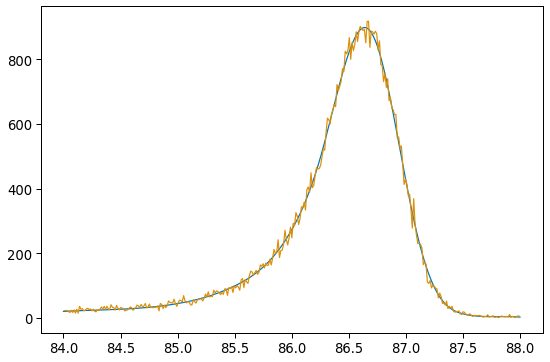

FWHM: 0.7685350026455495
[2.90584329e+02 8.66943666e+01 2.57489466e-01 1.46795967e+01
 8.66943666e+01 2.57489466e-01 1.16857380e+03 8.66943666e+01
 2.57489466e-01 2.24485334e+00 3.99678328e+00]
None


In [52]:
upper=7400
lower=6850

line_init = models.Gaussian1D(amplitude=500, mean=86.7, stddev=0.4) + ConstShelf(norm=10, mean=86.7, stddev=0.4) + \
    ExpTail(norm=800, mean=86.7, stddev=0.4, slope=1.5) + models.Const1D(amplitude=5)

# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper])

xs = np.linspace(84, 88, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line.parameters[-1] - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper], yerr=np.sqrt(eu_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(eu_spectrum[1][lower:upper], line(eu_spectrum[1][lower:upper]))

ax1.plot(eu_spectrum[1][lower:upper], line[0](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[1](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[2](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[3](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((1, 2000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(82.5, 800, r'Source: $^{155}$Eu')
ax1.text(82.5, 400, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(82.5, 200, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_grade0_86kev_fit_depthcut_noedges.pdf')
plt.close()

# chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\
#                    eu_spectrum[0][lower:upper])/len(eu_spectrum[0][lower:upper] - 7)
# print(chisq_red)


plt.figure(figsize=(9,6))
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 86) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 86) < 2])
plt.show()
plt.close()
del xs, spline
print('FWHM: ' + str(roots[1] - roots[0]))

print(line.parameters)
print(line.stds)

## Eu155 105keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_38892/1249148230.py:43: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_38892/1249148230.py:52: RuntimeWarning: divide by zero encountered in true_divide
  chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\


inf
0.8778918935866074
[1.26004743e+02 1.05546234e+02 2.81180547e-01 9.46659530e+00
 1.05546234e+02 2.81180547e-01 6.30006664e+02 1.05546234e+02
 2.81180547e-01 1.96009227e+00]
None


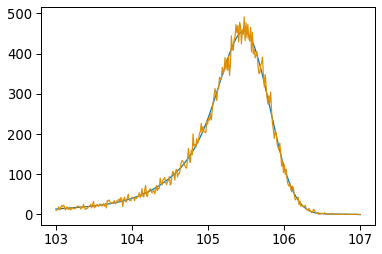

In [55]:
upper=8890
lower=8500
line_init = models.Gaussian1D(amplitude=250, mean=105, stddev=0.2) + ConstShelf(norm=0.1, mean=105, stddev=0.4) + \
        ExpTail(norm=100, mean=105, stddev=0.4, slope=.1)# + models.Const1D(amplitude=20)


# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

zero_mask = eu_spectrum[0][lower:upper]!=0

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper])

xs = np.linspace(103, 107, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][lower:upper], eu_spectrum[0][lower:upper], yerr=np.sqrt(eu_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(eu_spectrum[1][lower:upper], line(eu_spectrum[1][lower:upper]))

ax1.plot(eu_spectrum[1][lower:upper], line[0](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[1](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(eu_spectrum[1][lower:upper], line[2](eu_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((1, 2000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(102.2, 800, r'Source: $^{155}$Eu')
ax1.text(102.2, 400, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(102.2, 200, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')


ax2.errorbar(eu_spectrum[1][lower:upper], (eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper]))/np.sqrt(eu_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_grade0_105kev_fit_depthcut_noedges.pdf')
plt.close()

chisq_red = np.sum(((eu_spectrum[0][lower:upper] - line(eu_spectrum[1][lower:upper])) ** 2)/\
                   eu_spectrum[0][lower:upper])/len(eu_spectrum[0][lower:upper] - 7)
print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 105) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 105) < 2])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(line.stds)


## Am241 59.5keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_38892/871639245.py:40: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(am_spectrum[1][lower:upper], (am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper]))/np.sqrt(am_spectrum[0][lower:upper]),


0.6271955373424305
[2.01216459e+02 5.95763090e+01 2.15977219e-01 1.58392062e+01
 5.95763090e+01 2.15977219e-01 1.39664305e+03 5.95763090e+01
 2.15977219e-01 3.60431479e+00]
[[ 2.55379488e+03  1.51292908e-01  1.16062143e-01 -2.04628054e+01
  -5.04519929e+03 -6.25786777e+00]
 [ 1.51292908e-01  2.36410718e-05  3.31759645e-06 -2.59907009e-03
  -2.95042034e-01 -5.31771004e-04]
 [ 1.16062143e-01  3.31759645e-06  6.75513190e-06 -7.60429668e-04
  -2.32518479e-01 -2.55281274e-04]
 [-2.04628054e+01 -2.59907009e-03 -7.60429668e-04  1.20325710e+00
   3.95545192e+01  7.35351270e-02]
 [-5.04519929e+03 -2.95042034e-01 -2.32518479e-01  3.95545192e+01
   9.99393861e+03  1.23613001e+01]
 [-6.25786777e+00 -5.31771004e-04 -2.55281274e-04  7.35351270e-02
   1.23613001e+01  1.74598715e-02]]


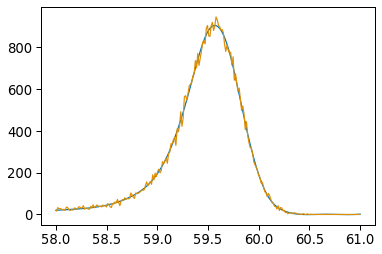

In [56]:
upper=5050
lower=4700

line_init = models.Gaussian1D(amplitude=150, mean=59.6, stddev=0.22) + ConstShelf(norm=11, mean=59.5, stddev=0.2) + \
    ExpTail(norm=920, mean=59.5, stddev=0.2, slope=3.7)# + models.Const1D(amplitude=20)

# line_init = models.Gaussian1D(amplitude=500, mean=59.5, stddev=0.2) + ConstShelf(norm=10, mean=59.5, stddev=0.2)


line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means

zero_mask = am_spectrum[0][lower:upper]!=0

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][lower:upper], am_spectrum[0][lower:upper])

xs = np.linspace(58, 61, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][lower:upper], am_spectrum[0][lower:upper], yerr=np.sqrt(am_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(am_spectrum[1][lower:upper], line(am_spectrum[1][lower:upper]))

ax1.plot(am_spectrum[1][lower:upper], line[0](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[1](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[2](am_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((1, 2000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(56.6, 800, r'Source: $^{241}$Am')
ax1.text(56.6, 400, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(56.6, 200, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(am_spectrum[1][lower:upper], (am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper]))/np.sqrt(am_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_grade0_60kev_fit_depthcut_noedges.pdf')
plt.close()


# chisq_red = np.sum(((am_spectrum[0][lower:upper][zero_mask] - line(am_spectrum[1][lower:upper][zero_mask])) ** 2)/\
#                    am_spectrum[0][lower:upper][zero_mask])/len(am_spectrum[0][lower:upper][zero_mask] - 7)
# print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 59.5) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 59.5) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])


## Am241 14keV

1.0969768824429555
0.4534150713523033
[2.14363286e+02 1.39252639e+01 1.65255222e-01 3.70864481e+02
 1.39252639e+01 1.65255222e-01 3.13218767e+00 8.11329784e+00]
[[ 5.93798319e+02 -5.31674801e-02  6.69687595e-02 -1.13117862e+03
  -5.18180423e+00 -1.55975817e+01]
 [-5.31674801e-02  1.13704454e-05 -8.44131176e-06  1.03197134e-01
   3.35760575e-04  3.98328758e-04]
 [ 6.69687595e-02 -8.44131176e-06  1.08530037e-05 -1.31533318e-01
  -5.71630364e-04 -2.00050960e-03]
 [-1.13117862e+03  1.03197134e-01 -1.31533318e-01  2.17697403e+03
   9.94201717e+00  2.86679276e+01]
 [-5.18180423e+00  3.35760575e-04 -5.71630364e-04  9.94201717e+00
   5.00006482e-02  1.76051208e-01]
 [-1.55975817e+01  3.98328758e-04 -2.00050960e-03  2.86679276e+01
   1.76051208e-01  1.48411636e+00]]


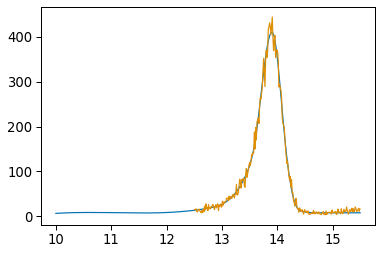

In [57]:
lower=1020
upper=1250

# line_init = models.Gaussian1D(amplitude=250, mean=13.9, stddev=0.3) + ConstShelf(norm=1, mean=13.9, stddev=0.2) + models.Const1D(amplitude=20)

line_init = models.Gaussian1D(amplitude=400, mean=13.9, stddev=0.2) + \
    ExpTail(norm=250, mean=13.9, stddev=0.2, slope=3.6) + models.Const1D(amplitude=10)

line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means


fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][lower:upper], am_spectrum[0][lower:upper])


xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots


fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][lower:upper], am_spectrum[0][lower:upper], yerr=np.sqrt(am_spectrum[0][lower:upper]), fmt='', ls='')
ax1.plot(am_spectrum[1][lower:upper], line(am_spectrum[1][lower:upper]))

ax1.plot(am_spectrum[1][lower:upper], line[0](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[1](am_spectrum[1][lower:upper]), ls='dashed')
ax1.plot(am_spectrum[1][lower:upper], line[2](am_spectrum[1][lower:upper]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim((1, 2000))
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(12.4, 800, r'Source: $^{241}$Am')
ax1.text(12.4, 400, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(12.4, 200, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(am_spectrum[1][lower:upper], (am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper]))/np.sqrt(am_spectrum[0][lower:upper]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_grade0_14kev_fit_depthcut_noedges.pdf')
plt.close()

chisq_red = np.sum(((am_spectrum[0][lower:upper] - line(am_spectrum[1][lower:upper])) ** 2)/\
                   am_spectrum[0][lower:upper])/len(am_spectrum[0][lower:upper] - 7)
print(chisq_red)

xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 14) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 14) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])
